① 카테고리별 소비 규모 & 빈도
📊 시각화

카테고리별 총 소비금액

카테고리별 총 결제 건수

왜 중요?
→ 카드 소비 데이터의 ‘시장 규모’를 보여줌
→ 추천의 기준점

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

DATA_PATH = "../food/*.csv"
file_list = sorted(glob.glob(DATA_PATH))

overall_sum = {}

for file in file_list:
    print(f"Processing {file}")
    
    for chunk in pd.read_csv(
        file,
        usecols=["card_tpbuz_nm_2", "amt", "cnt"],
        chunksize=200_000
    ):
        grouped = chunk.groupby("card_tpbuz_nm_2")[["amt", "cnt"]].sum()
        
        for cat, row in grouped.iterrows():
            if cat not in overall_sum:
                overall_sum[cat] = row
            else:
                overall_sum[cat] += row

df_overall = (
    pd.DataFrame(overall_sum)
    .T
    .sort_values("amt", ascending=False)
)

# 해당 부분 로컬보다 colab이 빠르기에 코랩에서 진행 후 csv 파일 만들 예정

In [ ]:
# 코랩에서 진행한 저장하기 위해 만든 경로
import os

OUTPUT_DIR = "/content/drive/MyDrive/data/output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
# 코랩에서 저장할 때 사용한 코드
df_overall_out = df_overall.reset_index()

df_overall_out.columns = ["category", "total_amt", "total_cnt"]

df_overall_out.to_csv(
    f"{OUTPUT_DIR}/overall_category_summary_202201_202511.csv",
    index=False,
    encoding="utf-8-sig"
)

In [17]:
# csv 파일 읽어오는 코드
import pandas as pd

OUTPUT_DIR = "../output"

df_overall = pd.read_csv(
    f"{OUTPUT_DIR}/overall_category_summary_202201_202511.csv"
)

df_overall.sort_values(by="total_amt", ascending=False)

,category,total_amt,total_cnt
0,한식,14231837129588,444169343
1,고기요리,4832101787774,83635120
2,커피/음료,4450253240273,497049761
3,일식/수산물,3983001301734,79728690
4,닭/오리요리,2583407720693,81527240
5,제과/제빵/떡/케익,2499151364491,190398054
6,분식,2268182376441,159427911
7,간이주점,2158785025691,47313706
8,패스트푸드,1822363675344,152450506
9,별식/퓨전요리,1699396050437,68397969


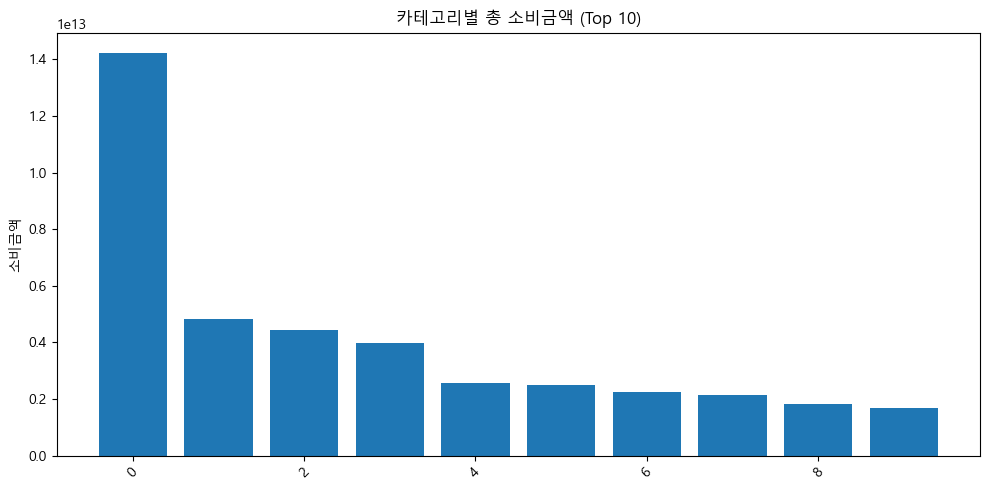

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

top10_amt = df_overall.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10_amt.index, top10_amt["total_amt"])
plt.xticks(rotation=45)
plt.title("카테고리별 총 소비금액 (Top 10)")
plt.ylabel("소비금액")
plt.tight_layout()
plt.show()
